# Data Analysis
This notebook contains the code required to analyse the serialised data produced by
the interface. Step by step is shows how to convert the data into a calibration curve and produce
values of DNA fragment size.

#### Size Markers
The `SIZE_MARKERS` constant is an array of integers corresponding the marker bands on the gel. This
allows for the calculation of the size of the other bands on the gel.

In [17]:
SIZE_MAKERS = [15000, 10000, 8000, 7000, 6000, 5000, 4000, 3000, 2000, 1500, 1000,
                        850, 650, 500, 400, 300, 200, 100]

In [18]:
import pickle
from collections import defaultdict

# First the data is read in from the .pickle file
with open("results.pickle", "rb") as data_file:
    data = pickle.load(data_file)

# Sort the bands into which well they are from
wells = defaultdict(list)
for band in data["bands"]:
    x, y = band
    wells[x].append(y - data["well_position"])

# Create a list of the marker bands
marker_bands = [position[1] - data["well_position"] for position in data["markers"]]

#### Describe data

In [19]:
print(f"Using {len(data['markers'])} DNA fragment markers.")
print(f"Calculating {len(wells)} wells and {sum([len(value) for _, value in wells.items()])} bands.")

Using 17 DNA fragment markers.
Calculating 17 wells and 61 bands.


#### Calculate a line of best fit

In [20]:
import numpy as np

x = np.array(marker_bands)
y = np.array(SIZE_MAKERS[:len(marker_bands)])
log_x = np.log(x)
log_y = np.log(y)
curve_fit = np.polyfit(x, log_y, 1)
m, c = curve_fit
derive_y = np.exp(c) * np.exp(m * x)

#### Plot Graph

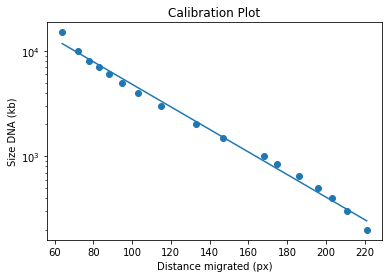

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.scatter(x, y)
plt.plot(x, derive_y)

ax.set_title("Calibration Plot")
ax.set_yscale("log")
ax.set_ylabel("Size DNA (kb)")
ax.set_xlabel("Distance migrated (px)")
plt.show()

#### Calculate and display bands

In [22]:
for key, value in wells.items():
    wells[key] = [np.exp(c) * np.exp(m * band) for band in value]

while any([value for value in wells.values()]):
    printed = ""
    for index, band in wells.items():
        if band:
            printed += f"{int(band.pop(0))} kBp".rjust(10, " ")
        else:
            printed += " " * 10
    print(printed)


  6317 kBp  4817 kBp  3411 kBp  2801 kBp  5724 kBp  4365 kBp  3955 kBp  2801 kBp 10863 kBp  9370 kBp  4155 kBp  2871 kBp  2416 kBp  4817 kBp  3765 kBp  3496 kBp  2601 kBp
  4699 kBp             995 kBp   879 kBp  4258 kBp  2942 kBp  2942 kBp  1019 kBp  8919 kBp  8082 kBp             901 kBp   816 kBp  3583 kBp             390 kBp  2243 kBp
  3328 kBp                       499 kBp  2942 kBp             486 kBp   524 kBp  7693 kBp  5724 kBp             816 kBp   430 kBp  2476 kBp                       837 kBp
  3016 kBp                                                                        6971 kBp  4155 kBp                                                               758 kBp
                                                                                  6163 kBp  2871 kBp                                                               399 kBp
                                                                                  5186 kBp                                                       